In [1]:
# adding this to suppress sklearn DeprecationWarnings...
import os
#os.environ["WORD_SENTIMENT_PATH"] = '.\\subjclueslen1-HLTEMNLP05.tff'
#os.environ["FEATURE_CACHE_DIR"] = '..\\cache\\'
from mpl_toolkits.mplot3d import Axes3D
from model.linear_regression_model import LinearRegressionModel
from model.MLPRegressionModel import MLPRegressionModel
from model.lstm_regression_model import LSTMRegressionModel

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import time
from sklearn.model_selection import train_test_split

from util.config import Config, RegressionModels
import matplotlib.pyplot as plt
from matplotlib import cm

from model.overall_runner import corpora_to_day_features, \
                                 init_corpora, combine_day_ranges, match_features_to_labels
    
import math
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import time

import cntk as C
import cntk.axis
from cntk.layers import Dense, Dropout, Recurrence

from IPython import display

%matplotlib inline

print('done importing')

done importing


In [2]:
PREDICT_DELAY_RANGE = range(1, 2)
DAY_RANGE_RANGE = range(1, 2)

delay = 1
day_range = 1

plot_x = [[]]
plot_y = [[]]
plot_z = [[]]

approval_ratings, political_article_corpora = init_corpora();

plot_x[delay - 1].append(delay)
plot_y[delay - 1].append(day_range)
Config.POLL_DELAY = delay
Config.DAY_RANGE = day_range

print("getting feature vectors...")
features_by_day = corpora_to_day_features(political_article_corpora)
#features_by_range = combine_day_ranges(features_by_day)
X, Y = match_features_to_labels(features_by_day, approval_ratings);
print("done.")
print("Number of days = {}".format(len(X)))

print("splitting test set...")
X_train_and_val, X_test, Y_train_and_val, Y_test = \
        train_test_split(X, Y, test_size=Config.TRAINING_PARTITION, random_state=2)
print("done.")

print("splitting validation set...")
X_train, X_val, Y_train, Y_val = \
        train_test_split(X_train_and_val, Y_train_and_val, test_size=0.125, random_state=2)
print("done.")

print("Number of days in train = {}".format(len(X_train)))
print("Number of days in test = {}".format(len(X_test)))
print("Number of days in validation = {}".format(len(X_val)))

if Config.REGRESSION_MODEL == RegressionModels.LINEAR_REGRESSION:
    model = LSTMRegressionModel([X_train, Y_train], val_data=[X_val, Y_val], test_data=[X_test, Y_test])
elif Config.REGRESSION_MODEL == RegressionModels.MLP:
    model = MLPRegressionModel([X_train, Y_train])
    
print("DONE WITH MY THINGS")

Loading daily approval ratings...
done.
Loading corpus of political articles...
Loading corpora for years between 1993 and 2002
Found articles for 364 days in the year 1993
Found articles for 365 days in the year 1994
Found articles for 365 days in the year 1995
Found articles for 366 days in the year 1996
Found articles for 365 days in the year 1997
Found articles for 365 days in the year 1998
Found articles for 365 days in the year 1999
Found articles for 366 days in the year 2000
Found articles for 365 days in the year 2001
done.
getting feature vectors...
done.
Number of days = 1650
splitting test set...
done.
splitting validation set...
done.
Number of days in train = 938
Number of days in test = 578
Number of days in validation = 134
initializing data arrays...
done.
Defining CNTK model...
done.
DONE WITH MY THINGS


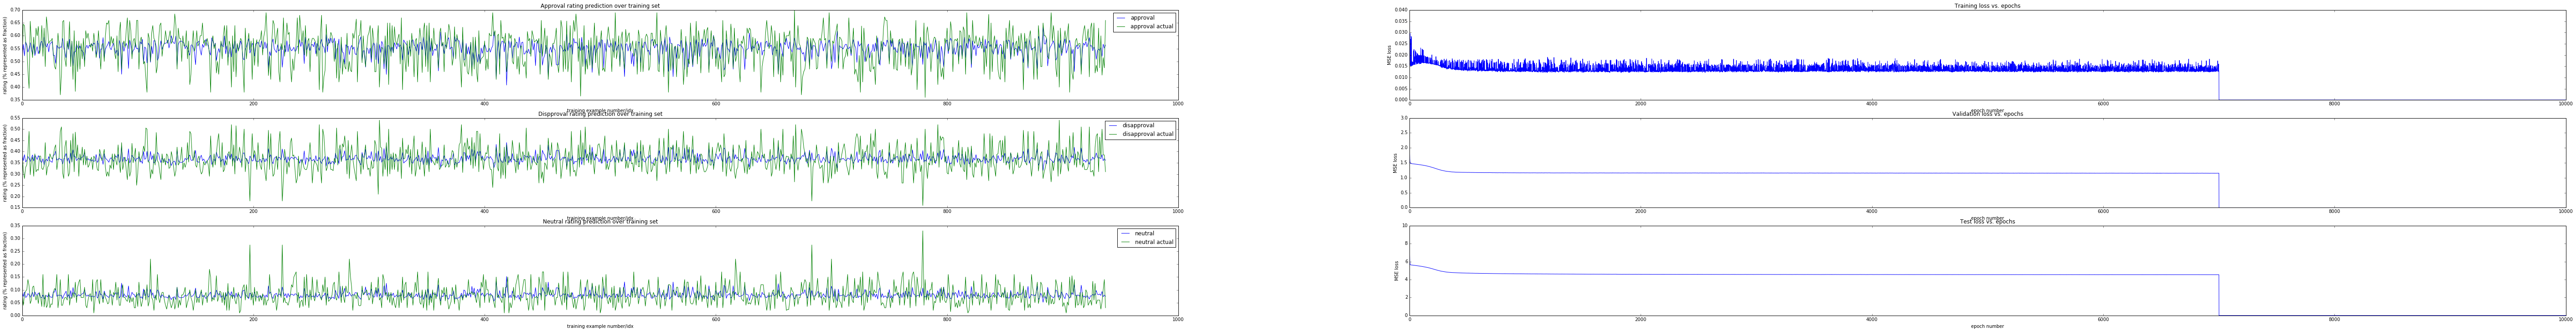

Training on epoch 7001
Training on epoch 7002
Training on epoch 7003
Training on epoch 7004
Training on epoch 7005
Training on epoch 7006
Training on epoch 7007
Training on epoch 7008
Training on epoch 7009
Training on epoch 7010
Training on epoch 7011
Training on epoch 7012
Training on epoch 7013
Training on epoch 7014
Training on epoch 7015
Training on epoch 7016
Training on epoch 7017
Training on epoch 7018
Training on epoch 7019
Training on epoch 7020
Training on epoch 7021
Training on epoch 7022
Training on epoch 7023
Training on epoch 7024
Training on epoch 7025
Training on epoch 7026
Training on epoch 7027
Training on epoch 7028
Training on epoch 7029
Training on epoch 7030
Training on epoch 7031
Training on epoch 7032
Training on epoch 7033
Training on epoch 7034
Training on epoch 7035
Training on epoch 7036
Training on epoch 7037
Training on epoch 7038
Training on epoch 7039
Training on epoch 7040
Training on epoch 7041
Training on epoch 7042
Training on epoch 7043
Training on

KeyboardInterrupt: 

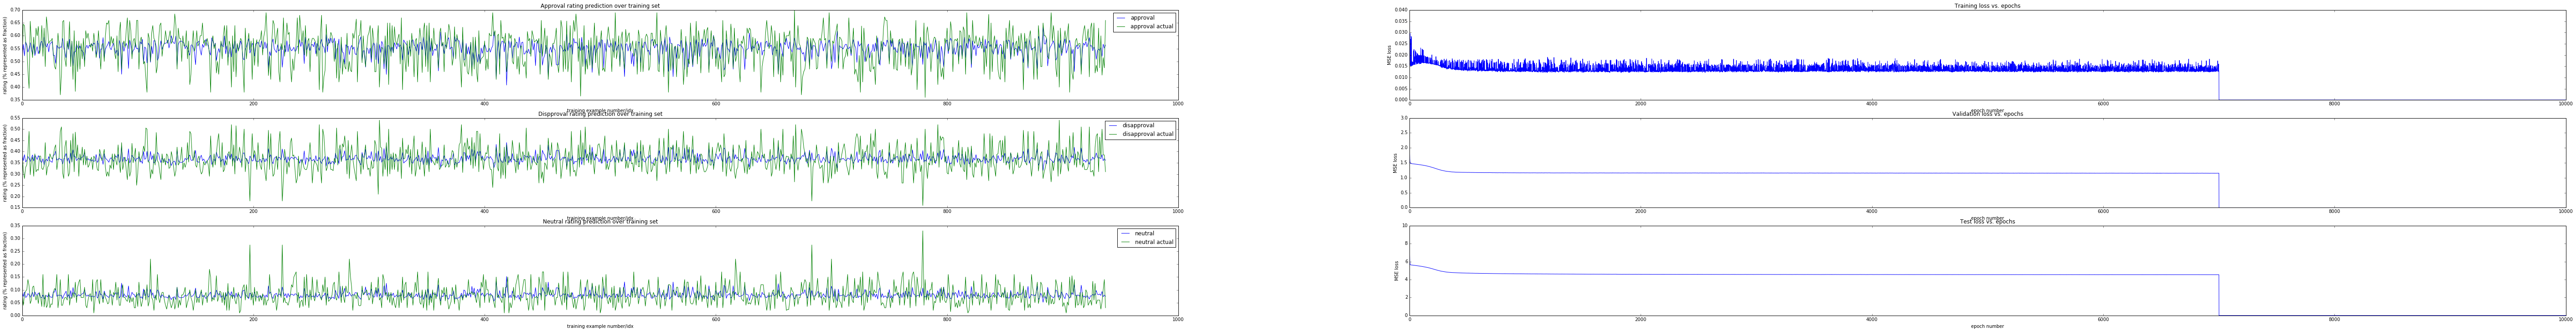

In [3]:
print(model)
model.train(save_intermediates=True, save_prefix="badass_lstm", num_epochs=10000)